In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
df = pd.read_csv('Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
X = df[['Annual Income (k$)','Spending Score (1-100)']]


In [ ]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


Original data withour any clusters

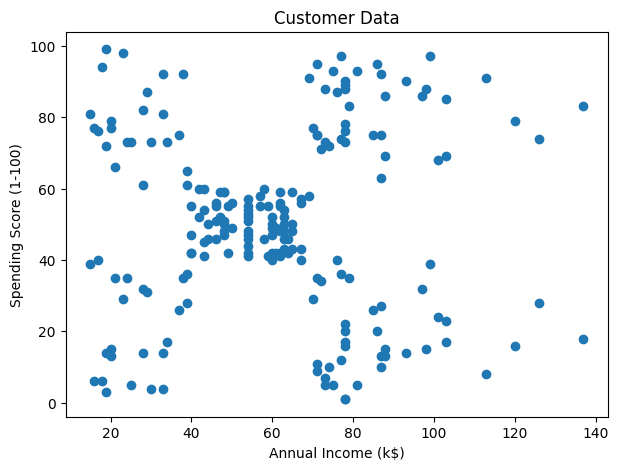

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Data')
plt.show()

In [ ]:
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [ ]:
dbscan = DBSCAN(eps=0.3,min_samples=5)
clusters = dbscan.fit_predict(X)

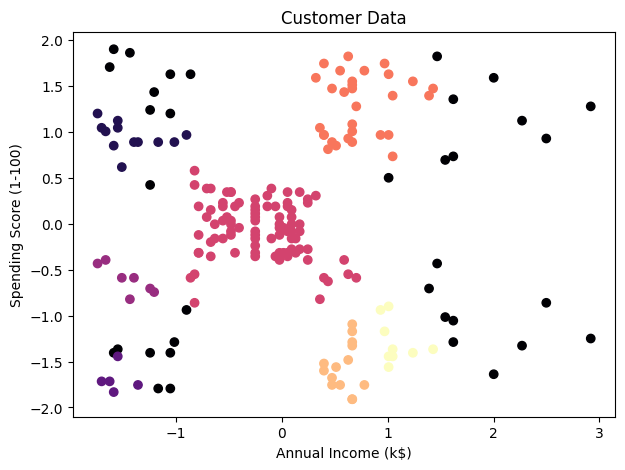

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(X[:,0],X[:,1],c=clusters,cmap='magma')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Data')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
print('Silhouette Score: ',silhouette_score(X,clusters))

Silhouette Score:  0.31614121976731185


In [ ]:
eps_value = [0.2,0.3,0.5]
for eps in eps_value:
  print(f"\nEvaluating DBSCAN using eps= {eps}")
  dbscan = DBSCAN(eps=eps,min_samples=5)
  labels = dbscan.fit_predict(X)
  unique_labels = set(labels)
  n_clusters = len(unique_labels) - (1 if -1 in labels else 0)

  n_noise = list(labels).count(-1)
  noise_ration = n_noise/len(labels)
  print(f"Number of clusters: {n_clusters}")
  print(f"Number of noise points: ",round(n_noise,2))
  print(f"Noise Ratio: {noise_ration}")

  if n_clusters > 1:
    X_cluster = X[labels!=-1]
    labels_cluster = labels[labels!=-1]
    silhouette_avg = silhouette_score(X_cluster,labels_cluster)

    print(f"Silhouette Score: {silhouette_avg}")


Evaluating DBSCAN using eps= 0.2
Number of clusters: 7
Number of noise points:  77
Noise Ratio: 0.385
Silhouette Score: 0.5856126991466907

Evaluating DBSCAN using eps= 0.3
Number of clusters: 7
Number of noise points:  35
Noise Ratio: 0.175
Silhouette Score: 0.5243276105881419

Evaluating DBSCAN using eps= 0.5
Number of clusters: 2
Number of noise points:  8
Noise Ratio: 0.04
Silhouette Score: 0.3875583892728279


**Task: New York City Taxi Trip Duration**

In [ ]:
uploaded = files.upload()

Saving NewYorkCityTaxiTripDuration.csv to NewYorkCityTaxiTripDuration.csv


1. Load the Dataset                 
Load the CSV file into a pandas DataFrame.            
Display the first 5 rows of the dataset.

In [ ]:
import pandas as pd
df = pd.read_csv("NewYorkCityTaxiTripDuration.csv",usecols=["pickup_latitude","pickup_longitude"],
                 dtype={
                     "pickup_latitude":"float32",
                     "pickup_longitude":"float32"
                 },nrows = 10000)
df.head()


,pickup_longitude,pickup_latitude
0,-73.982155,40.767937
1,-73.980415,40.738564
2,-73.979027,40.763939
3,-74.010040,40.719971
4,-73.973053,40.793209


2. Feature Selection                 
Extract the following columns:             
pickup_latitude             
pickup_longitude                  
Store them in a variable named X.

In [ ]:
X = df[['pickup_latitude', 'pickup_longitude']]
X.head()


,pickup_latitude,pickup_longitude
0,40.767937,-73.982155
1,40.738564,-73.980415
2,40.763939,-73.979027
3,40.719971,-74.010040
4,40.793209,-73.973053


3. Data Preprocessing              
Apply StandardScaler to scale the selected features.                  
Store the scaled data in X_scaled.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=['pickup_latitude', 'pickup_longitude'])
X_scaled.head()


,pickup_latitude,pickup_longitude
0,0.604664,-0.232663
1,-0.445852,-0.187517
2,0.461684,-0.151479
3,-1.110815,-0.956395
4,1.508517,0.003564


4. DBSCAN Model – Experiment 1            
Apply DBSCAN with:               
eps = 0.2          
min_samples = 5           
Store cluster labels in labels_1.

In [ ]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.05, min_samples=50)
db.fit(X_scaled)
df['cluster'] = db.labels_
df.head(10)


,pickup_longitude,pickup_latitude,cluster
0,-73.982155,40.767937,0
1,-73.980415,40.738564,-1
2,-73.979027,40.763939,0
3,-74.010040,40.719971,-1
4,-73.973053,40.793209,-1
5,-73.982857,40.742195,6
6,-73.969017,40.757839,0
7,-73.969276,40.797779,-1
8,-73.999481,40.738400,-1
9,-73.981049,40.744339,-1


5. DBSCAN Model – Experiment 2                
Apply DBSCAN with:                 
eps = 0.3                   
min_samples = 5                   
Store cluster labels in labels_2.         

In [ ]:

num_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
print(f"Number of natural pickup hotspots: {num_clusters}")


cluster_counts = df['cluster'].value_counts()
print("Cluster sizes (number of pickups in each cluster, -1 is noise):")
print(cluster_counts)


Number of natural pickup hotspots: 19
Cluster sizes (number of pickups in each cluster, -1 is noise):
cluster
-1     5850
 0     2145
 1      435
 4      168
 9      150
 5      133
 6      130
 2      112
 10     108
 8      104
 12      89
 11      81
 13      70
 14      68
 3       68
 15      66
 7       62
 16      61
 17      50
 18      50
Name: count, dtype: int64


6. DBSCAN Model – Experiment 3              
Apply DBSCAN with:                 
eps = 0.5              
min_samples = 5                
Store cluster labels in labels_3.

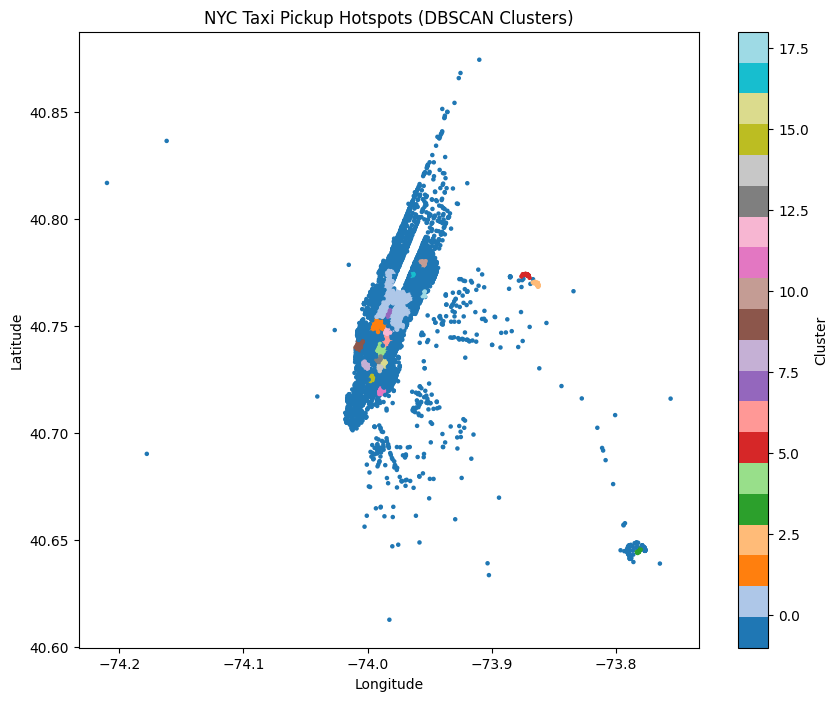

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(df['pickup_longitude'], df['pickup_latitude'],
            c=df['cluster'], cmap='tab20', s=5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('NYC Taxi Pickup Hotspots (DBSCAN Clusters)')
plt.colorbar(label='Cluster')
plt.show()


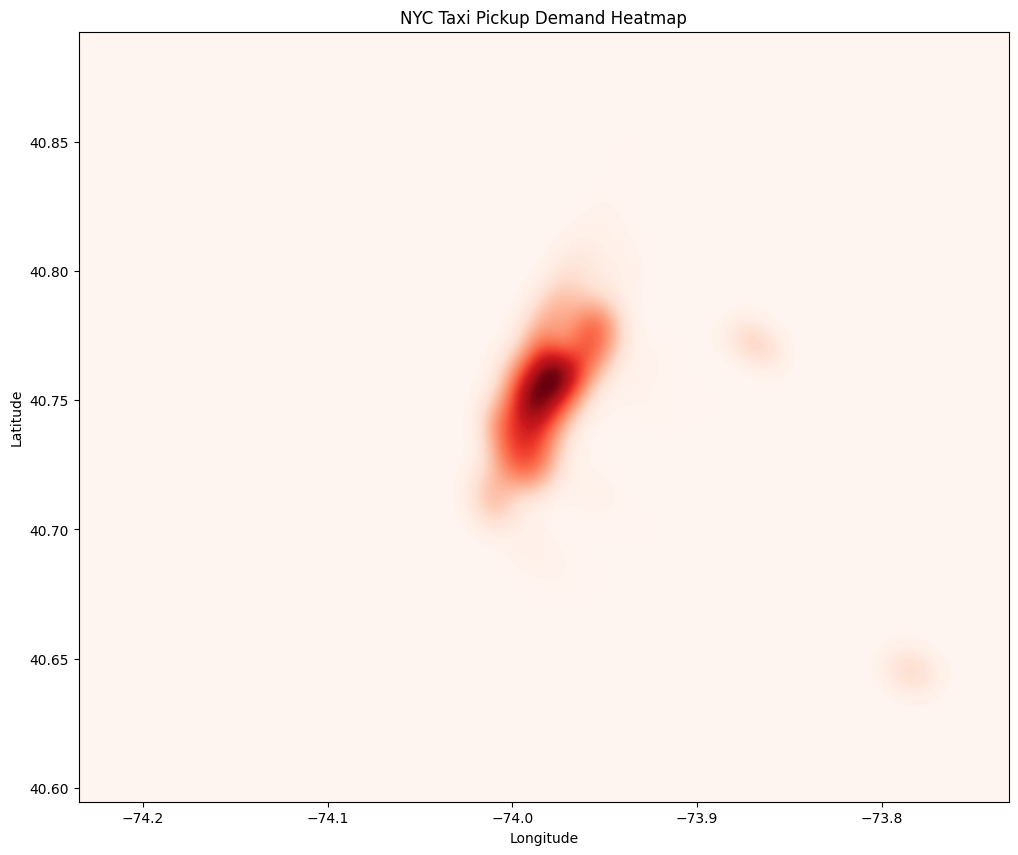

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 10))


sns.kdeplot(
    x=df['pickup_longitude'],
    y=df['pickup_latitude'],
    fill=True,
    cmap='Reds',
    thresh=0,
    levels=100
)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('NYC Taxi Pickup Demand Heatmap')
plt.show()


7. Cluster Evaluation                   
For each experiment:           
Print:          
Number of clusters (excluding noise)         
Number of noise points            
Noise ratio    

In [ ]:
from sklearn.metrics import silhouette_score

labels = df['cluster']


mask = labels != -1
if len(set(labels[mask])) > 1:
    sil_score = silhouette_score(X_scaled[mask], labels[mask])
    print(f"Silhouette Score (ignoring noise): {sil_score:.4f}")
else:
    print("Not enough clusters to calculate Silhouette Score.")


num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters (hotspots): {num_clusters}")


num_noise = list(labels).count(-1)
print(f"Number of noise points: {num_noise}")


cluster_sizes = df['cluster'].value_counts()
print("Cluster sizes:")
print(cluster_sizes)


Silhouette Score (ignoring noise): 0.2356
Number of clusters (hotspots): 20
Number of noise points: 5850
Cluster sizes:
cluster
-1     5850
 0     2145
 1      435
 4      168
 9      150
 5      133
 6      130
 2      112
 10     108
 8      104
 12      89
 11      81
 13      70
 14      68
 3       68
 15      66
 7       62
 16      61
 17      50
 18      50
Name: count, dtype: int64


8. Silhouette Score Calculation            
Remove noise points (-1) from each experiment.     
Calculate and print the Silhouette Score for:    
Experiment 1          
Experiment 2                
Experiment 3              
If silhouette score is not applicable, print                                        "Not Applicable".       

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import numpy as np


eps_values = [0.03, 0.05, 0.07]
min_samples = 50

sil_scores = []

for i, eps in enumerate(eps_values, start=1):
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(X_scaled)


    mask = labels != -1

    if len(set(labels[mask])) > 1:
        score = silhouette_score(X_scaled[mask], labels[mask])
        sil_scores.append(score)
        print(f"Experiment {i}: Silhouette Score = {score:.4f}")
    else:
        sil_scores.append(None)
        print(f"Experiment {i}: Silhouette Score = Not Applicable")


Experiment 1: Silhouette Score = 0.7679
Experiment 2: Silhouette Score = 0.2356
Experiment 3: Silhouette Score = 0.2823


9. Visualization                  
For each experiment:                 
Plot pickup locations using a scatter plot.         
Color points based on cluster labels.         
Highlight noise points using a separate color.

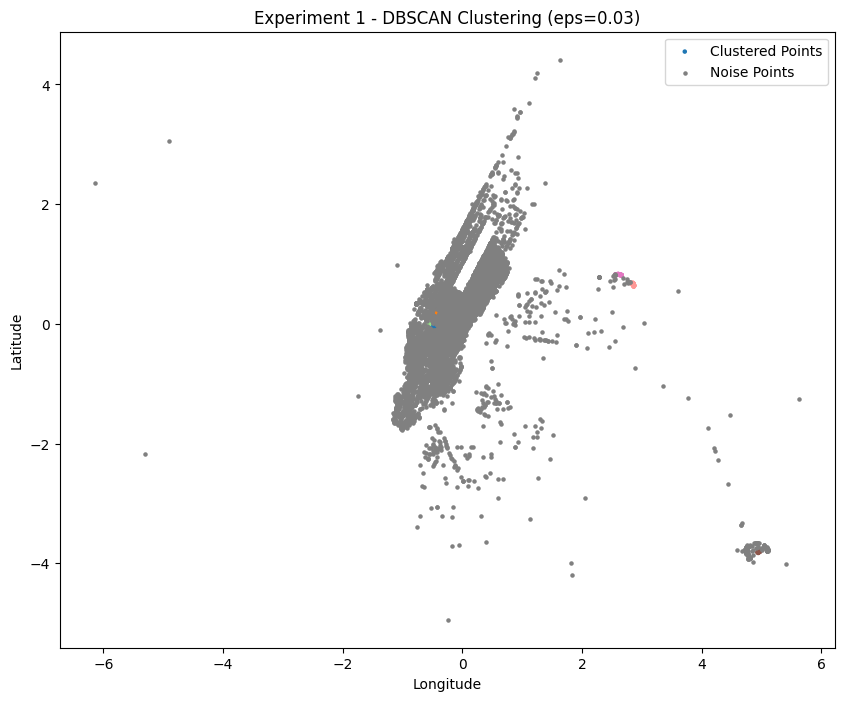

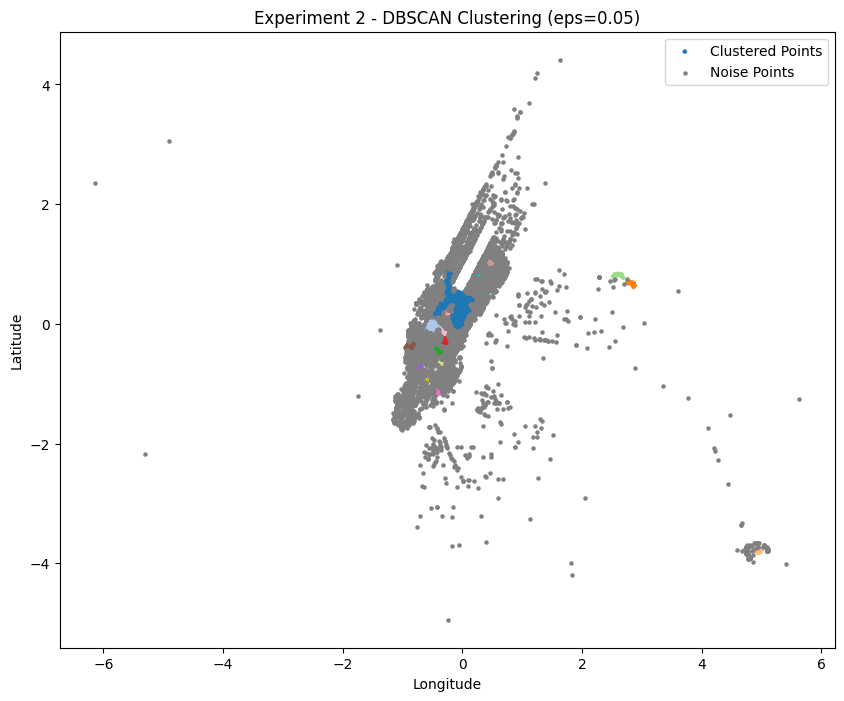

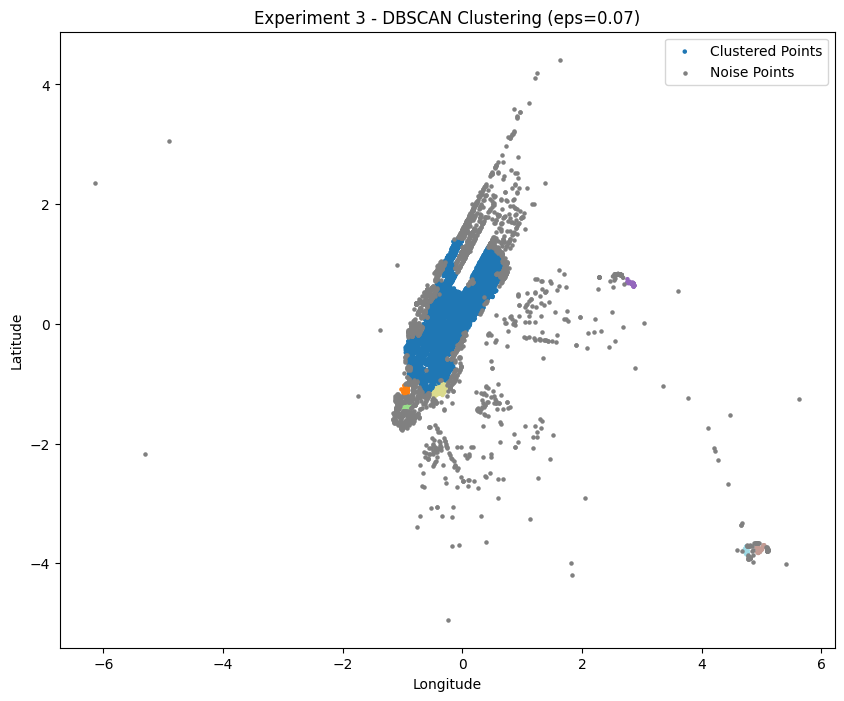

In [ ]:
import matplotlib.pyplot as plt

for i, eps in enumerate(eps_values, start=1):
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(X_scaled)

    plt.figure(figsize=(10, 8))


    mask = labels != -1
    plt.scatter(X_scaled.loc[mask, 'pickup_longitude'],
                X_scaled.loc[mask, 'pickup_latitude'],
                c=labels[mask], cmap='tab20', s=5, label='Clustered Points')


    mask_noise = labels == -1
    plt.scatter(X_scaled.loc[mask_noise, 'pickup_longitude'],
                X_scaled.loc[mask_noise, 'pickup_latitude'],
                color='grey', s=5, label='Noise Points')

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'Experiment {i} - DBSCAN Clustering (eps={eps})')
    plt.legend()
    plt.show()


10. Best Model Selection              
Based on:           
Number of clusters               
Noise ratio          
Silhouette score            
Print:           
Best eps value = ___

In [ ]:
best_index = None
best_score = -1
noise_ratios = []

for i, eps in enumerate(eps_values):
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(X_scaled)


    noise_ratio = np.sum(labels == -1) / len(labels)
    noise_ratios.append(noise_ratio)


    mask = labels != -1
    if len(set(labels[mask])) > 1:
        score = silhouette_score(X_scaled[mask], labels[mask])
    else:
        score = -1


    if score > best_score or (score == best_score and noise_ratio < noise_ratios[best_index]):
        best_score = score
        best_index = i

print(f"Best eps value = {eps_values[best_index]}")
print(f"Silhouette Score = {best_score:.4f}")
print(f"Noise ratio = {noise_ratios[best_index]:.4f}")


Best eps value = 0.03
Silhouette Score = 0.7679
Noise ratio = 0.9102
